In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("Student_performance_data _.csv")

In [ ]:
data.sample(5)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
1922,2923,18,0,3,3,18.731312,12,0,2,1,0,0,0,2.234696,3.0
1229,2230,17,1,0,2,4.185755,0,0,2,1,1,0,0,3.343051,1.0
2186,3187,15,1,3,1,8.384985,19,1,2,1,1,0,0,1.557870,3.0
398,1399,18,1,2,1,0.167094,17,1,3,1,0,0,1,1.868759,4.0
1336,2337,17,0,0,0,14.252028,8,0,3,0,0,0,0,2.791386,2.0


In [ ]:
data.isna().sum()

,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


In [ ]:
data.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [ ]:
for col in data.columns:
    print(data[col].value_counts())

StudentID
1001    1
2590    1
2592    1
2593    1
2594    1
       ..
1798    1
1799    1
1800    1
1801    1
3392    1
Name: count, Length: 2392, dtype: int64
Age
15    630
16    593
17    587
18    582
Name: count, dtype: int64
Gender
1    1222
0    1170
Name: count, dtype: int64
Ethnicity
0    1207
1     493
2     470
3     222
Name: count, dtype: int64
ParentalEducation
2    934
1    728
3    367
0    243
4    120
Name: count, dtype: int64
StudyTimeWeekly
19.833723    1
16.082185    1
2.543624     1
7.971184     1
3.403053     1
            ..
18.116988    1
10.324956    1
3.074986     1
18.434533    1
17.819907    1
Name: count, Length: 2392, dtype: int64
Absences
25    93
13    93
12    92
8     91
19    90
20    90
6     88
15    87
23    86
7     86
1     85
27    84
14    84
5     83
21    83
17    81
24    81
26    80
3     79
16    79
18    79
11    71
22    71
2     69
29    69
4     69
0     67
9     67
10    61
28    54
Name: count, dtype: int64
Tutoring
0    1671
1     7

In [ ]:
Studytime_mean=data['StudyTimeWeekly'].mean()

In [ ]:
data_lower_than_mean = data[data['StudyTimeWeekly'] < Studytime_mean]
data_lower_than_mean[["ParentalSupport", "StudyTimeWeekly"]]

,ParentalSupport,StudyTimeWeekly
2,2,4.210570
4,3,4.672495
5,1,8.191219
8,2,4.562008
11,2,7.598486
...,...,...
2374,3,2.313504
2380,1,2.138397
2385,3,1.445434
2388,4,7.583217


In [ ]:
data_higher_than_mean = data[data['StudyTimeWeekly'] > Studytime_mean]
data_higher_than_mean[["ParentalSupport", "StudyTimeWeekly"]]

,ParentalSupport,StudyTimeWeekly
0,2,19.833723
1,1,15.408756
3,3,10.028829
6,3,15.601680
7,1,15.424496
...,...,...
2384,3,16.655581
2386,2,13.814021
2387,4,10.680555
2390,2,12.416653


In [ ]:
data['ParentalSupport'].value_counts()

,count
ParentalSupport,
2,740
3,697
1,489
4,254
0,212


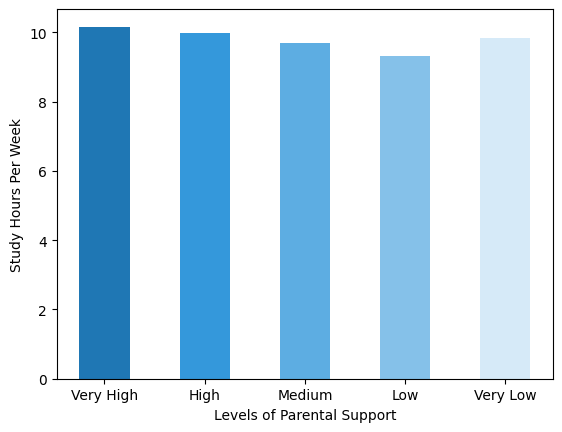

In [ ]:
studying_hour_very_high_support = data['StudyTimeWeekly'][data['ParentalSupport'] == 4].mean()
studying_hour_high_support = data['StudyTimeWeekly'][data['ParentalSupport'] ==  3].mean()
studying_hour_medium_support = data['StudyTimeWeekly'][data['ParentalSupport'] ==  2].mean()
studying_hour_low_support = data['StudyTimeWeekly'][data['ParentalSupport'] == 1].mean()
studying_hour_very_low_support = data['StudyTimeWeekly'][data['ParentalSupport'] ==  0].mean()

x = ['Very High','High', 'Medium', 'Low','Very Low']
y = [studying_hour_very_high_support,studying_hour_high_support, studying_hour_medium_support, studying_hour_low_support,studying_hour_very_low_support]

plt.bar(x, y, color = ['#1f77b4', '#3498db', '#5dade2', '#85c1e9', '#d6eaf8'], width=0.5)
plt.rcParams["figure.figsize"] = (8, 6)
plt.xlabel('Levels of Parental Support')
plt.ylabel('Study Hours Per Week')
plt.show()

### We can notice that study hours per week of students does not depend on level of parental support

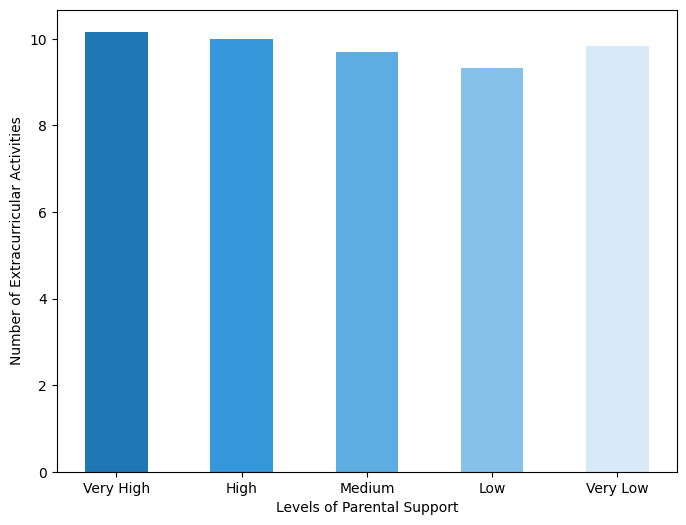

In [ ]:
activities_very_high_support = data[['Extracurricular','Sports', 'Music', 'Volunteering']][data['ParentalSupport'] == 4].mean()
activities_high_support = data[['Extracurricular','Sports', 'Music', 'Volunteering']][data['ParentalSupport'] == 3].mean()
activities_medium_support = data[['Extracurricular','Sports', 'Music', 'Volunteering']][data['ParentalSupport'] == 2].mean()
activities_low_support = data[['Extracurricular','Sports', 'Music', 'Volunteering']][data['ParentalSupport'] == 1].mean()
activities_very_low_support = data[['Extracurricular','Sports', 'Music', 'Volunteering']][data['ParentalSupport'] == 0].mean()
x = ['Very High','High', 'Medium', 'Low','Very Low']
y = [studying_hour_very_high_support,studying_hour_high_support, studying_hour_medium_support, studying_hour_low_support,studying_hour_very_low_support]
plt.bar(x, y, color = ['#1f77b4', '#3498db', '#5dade2', '#85c1e9', '#d6eaf8'], width=0.5)
plt.rcParams["figure.figsize"] = (8, 6)
plt.xlabel('Levels of Parental Support')
plt.ylabel('Number of Extracurricular Activities')
plt.show()

### We can notice that participation in extracurricular activities of students does not depend on level of parental support

In [ ]:
GPA_mean=data["GPA"].mean()

In [ ]:
data['ParentalSupport'][data['GPA']<GPA_mean]

,ParentalSupport
2,2
4,3
7,1
11,2
12,3
...,...
2382,2
2383,4
2385,3
2389,2


In [ ]:
very_high_support_low_grade = len(data[(data['ParentalSupport']==4) & (data['GPA']<GPA_mean)])
high_support_low_grade = len(data[(data['ParentalSupport']==3) & (data['GPA']<GPA_mean)])
medium_support_low_grade = len(data[(data['ParentalSupport']==2) & (data['GPA']<GPA_mean)])
low_support_low_grade = len(data[(data['ParentalSupport']==1) & (data['GPA']<GPA_mean)])
very_low_support_low_grade = len(data[(data['ParentalSupport']==0) & (data['GPA']<GPA_mean)])

print(very_high_support_low_grade,high_support_low_grade,medium_support_low_grade,low_support_low_grade,very_low_support_low_grade)

100 325 376 272 133


In [ ]:
very_high_support_high_grade = len(data[(data['ParentalSupport']==4) & (data['GPA']>GPA_mean)])
high_support_high_grade = len(data[(data['ParentalSupport']==3) & (data['GPA']>GPA_mean)])
medium_support_high_grade = len(data[(data['ParentalSupport']==2) & (data['GPA']>GPA_mean)])
low_support_high_grade = len(data[(data['ParentalSupport']==1) & (data['GPA']>GPA_mean)])
very_low_support_high_grade = len(data[(data['ParentalSupport']==0) & (data['GPA']>GPA_mean)])
print(very_high_support_high_grade,medium_support_high_grade,high_support_high_grade,low_support_high_grade,very_low_support_high_grade)

154 364 372 217 79


In [ ]:
very_high_support_low_grade_percentage=very_high_support_low_grade/(very_high_support_low_grade+very_high_support_high_grade)*100
high_support_low_grade_percentage=high_support_low_grade/(high_support_low_grade+high_support_high_grade)*100
medium_support_low_grade_percentage=medium_support_low_grade/(medium_support_low_grade+medium_support_high_grade)*100
low_support_low_grade_percentage=low_support_low_grade/(low_support_low_grade+low_support_high_grade)*100
very_low_support_low_grade_percentage=very_low_support_low_grade/(very_low_support_low_grade+very_low_support_high_grade)*100
print(very_high_support_low_grade_percentage,high_support_low_grade_percentage,medium_support_low_grade_percentage,low_support_low_grade_percentage,very_low_support_low_grade_percentage)

39.37007874015748 46.6284074605452 50.810810810810814 55.623721881390594 62.735849056603776


In [ ]:
very_low_support_high_grade_percentage=very_low_support_high_grade/(very_low_support_low_grade+very_low_support_high_grade)*100
low_support_high_grade_percentage=low_support_high_grade/(low_support_low_grade+low_support_high_grade)*100
medium_support_high_grade_percentage=medium_support_high_grade/(medium_support_low_grade+medium_support_high_grade)*100
high_support_high_grade_percentage=high_support_high_grade/(high_support_low_grade+high_support_high_grade)*100
very_high_support_high_grade_percentage=very_high_support_high_grade/(very_high_support_low_grade+very_high_support_high_grade)*100
print(very_high_support_high_grade_percentage,high_support_high_grade_percentage,medium_support_high_grade_percentage,low_support_high_grade_percentage,very_low_support_high_grade_percentage)

60.629921259842526 53.3715925394548 49.18918918918919 44.376278118609406 37.264150943396224


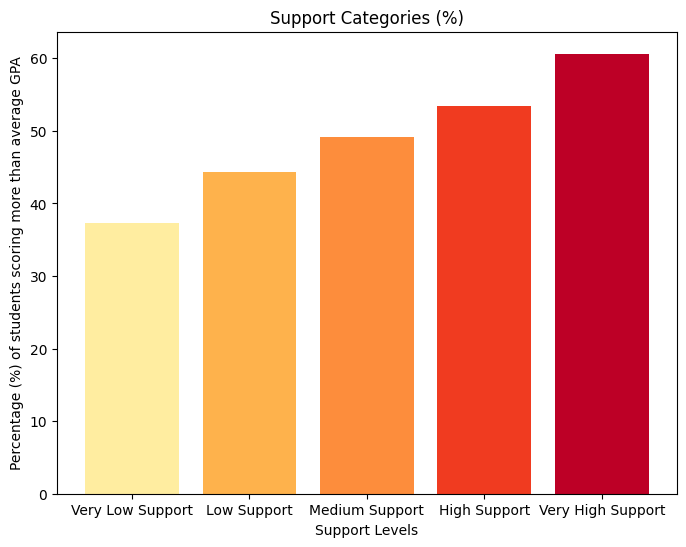

In [ ]:
categories = ['Very Low Support','Low Support', 'Medium Support', 'High Support','Very High Support']
values = [very_low_support_high_grade_percentage,low_support_high_grade_percentage, medium_support_high_grade_percentage, high_support_high_grade_percentage,very_high_support_high_grade_percentage]

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color = ['#ffeda0', '#feb24c', '#fd8d3c', '#f03b20', '#bd0026'])

# Add title and labels
plt.title('Support Categories (%)')
plt.xlabel('Support Levels')
plt.ylabel('Percentage (%) of students scoring more than average GPA')

# Display the plot
plt.show()


### We can notice that a higher percentage of students with final GPA above average have very higher parental support

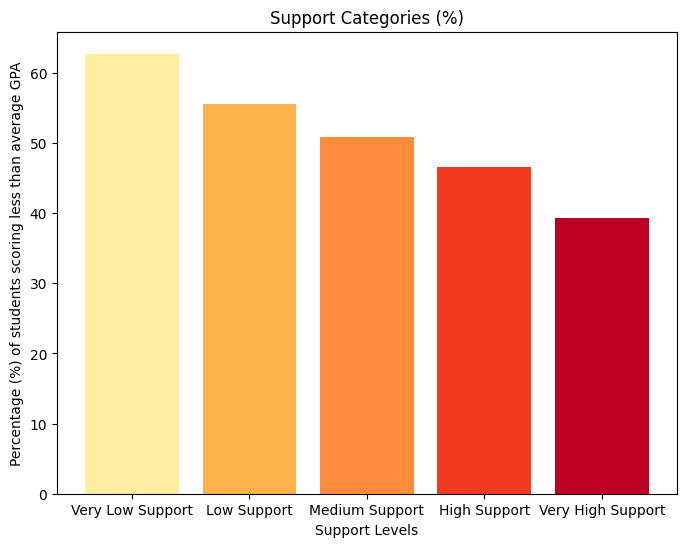

In [ ]:
categories = ['Very Low Support','Low Support', 'Medium Support', 'High Support','Very High Support']
values = [very_low_support_low_grade_percentage,low_support_low_grade_percentage, medium_support_low_grade_percentage, high_support_low_grade_percentage,very_high_support_low_grade_percentage]

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['#ffeda0', '#feb24c', '#fd8d3c', '#f03b20', '#bd0026'])

# Add title and labels
plt.title('Support Categories (%)')
plt.xlabel('Support Levels')
plt.ylabel('Percentage (%) of students scoring less than average GPA')

# Display the plot
plt.show()


### We can notice that a higher percentage of students with final GPA below average have very lower parental support

In [ ]:
mean_absence=data['Absences'].mean()
print(mean_absence)
print(data['Absences'].max())
print(data['Absences'].min())

14.54138795986622
29
0


In [ ]:
len(data[(data['Absences']<data['Absences'].mean()) & (data['ParentalSupport']==3)])

348

In [ ]:
len(data[(data['Absences']<data['Absences'].mean()) & (data['ParentalSupport']==2)])

362

In [ ]:
len(data[(data['Absences']<data['Absences'].mean()) & (data['ParentalSupport']==1)])

253

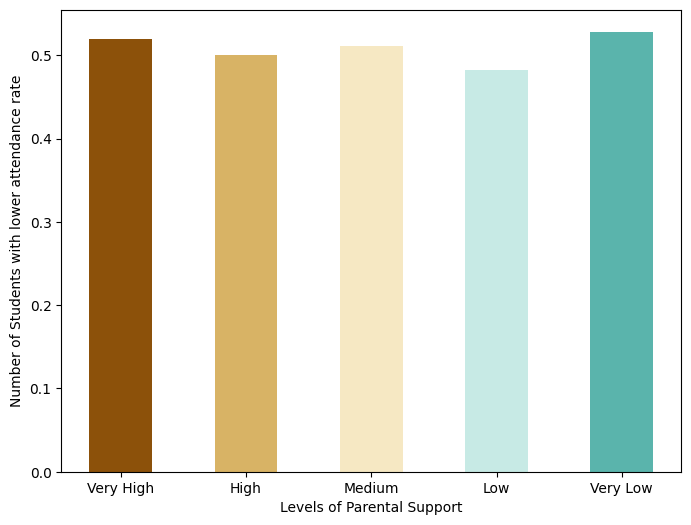

In [ ]:
low_attendance_very_high_support = len(data[(data['Absences']>mean_absence) & (data['ParentalSupport']==4)])/(len(data[(data['Absences']>mean_absence) & (data['ParentalSupport']==4)])+len(data[(data['Absences']<mean_absence) & (data['ParentalSupport']==4)]))
low_attendance_high_support = len(data[(data['Absences']>mean_absence) & (data['ParentalSupport']==3)])/(len(data[(data['Absences']>mean_absence) & (data['ParentalSupport']==3)])+len(data[(data['Absences']<mean_absence) & (data['ParentalSupport']==3)]))
low_attendance_medium_support = len(data[(data['Absences']>mean_absence) & (data['ParentalSupport']==2)])/(len(data[(data['Absences']>mean_absence) & (data['ParentalSupport']==2)])+len(data[(data['Absences']<mean_absence) & (data['ParentalSupport']==2)]))
low_attendance_low_support = len(data[(data['Absences']>mean_absence) & (data['ParentalSupport']==1)])/(len(data[(data['Absences']>mean_absence) & (data['ParentalSupport']==1)])+len(data[(data['Absences']<mean_absence) & (data['ParentalSupport']==1)]))
low_attendance_very_low_support = len(data[(data['Absences']>mean_absence) & (data['ParentalSupport']==0)])/(len(data[(data['Absences']>mean_absence) & (data['ParentalSupport']==0)])+len(data[(data['Absences']<mean_absence) & (data['ParentalSupport']==0)]))

x = ['Very High','High', 'Medium', 'Low','Very Low']
y=[low_attendance_very_high_support,low_attendance_high_support, low_attendance_medium_support, low_attendance_low_support,low_attendance_very_low_support]
plt.bar(x, y, color=['#8c510a', '#d8b365', '#f6e8c3', '#c7eae5', '#5ab4ac'], width=0.5)
plt.rcParams["figure.figsize"] = (8, 6)
plt.xlabel('Levels of Parental Support')
plt.ylabel('Number of Students with lower attendance rate')
plt.show()

### We can notice that attendance rate of students does not depend on level of parental support

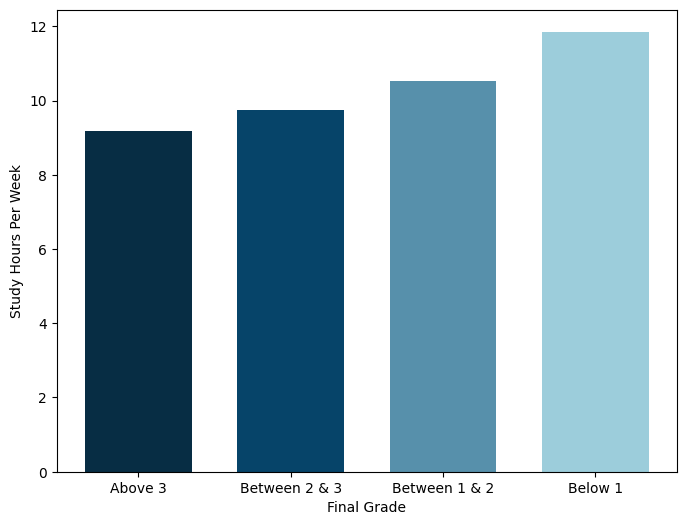

In [ ]:
more_than_3_GradeClass = data[data['GradeClass']>3]['StudyTimeWeekly'].mean()
from_2_to_3_GradeClass = data[(data['GradeClass']>2) & (data['GradeClass']<=3)]['StudyTimeWeekly'].mean()
from_1_to_2_GradeClass = data[(data['GradeClass']>=1) & (data['GradeClass']<=2)]['StudyTimeWeekly'].mean()
less_than_1_GradeClass = data[data['GradeClass']<1]['StudyTimeWeekly'].mean()

x = ['Above 3', 'Between 2 & 3', 'Between 1 & 2', 'Below 1']
y= [more_than_3_GradeClass, from_2_to_3_GradeClass, from_1_to_2_GradeClass, less_than_1_GradeClass]

plt.bar(x, y, color=["#072D44", "#064469", "#5790AB", "#9CCDDB"], width=0.7)
plt.rcParams["figure.figsize"] = (8, 6)
plt.xlabel('Final Grade')
plt.ylabel('Study Hours Per Week')
plt.show()

### From above plot, we can notice that students with final grade class above 3(Low grade) have smallest study hours per week

2.983695652173913


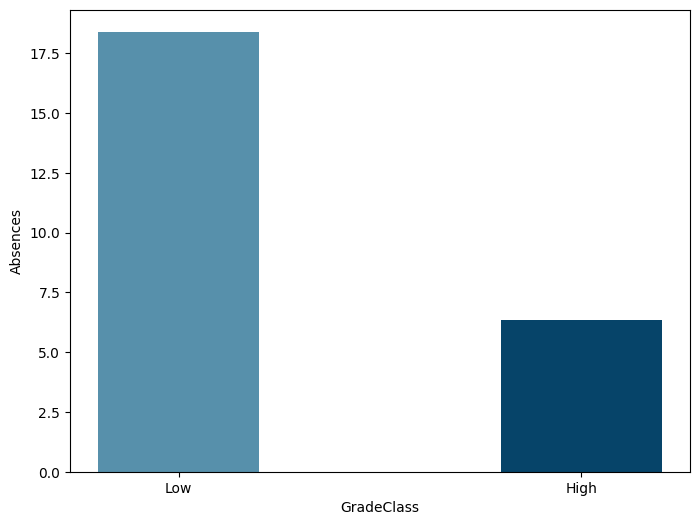

In [ ]:
mean_Grade_class=data['GradeClass'].mean()
print(mean_Grade_class)
high_final_grades = data[data['GradeClass']<mean_Grade_class]['Absences'].mean()
low_final_grades = data[data['GradeClass']>mean_Grade_class]['Absences'].mean()

x = ['Low', 'High']
y = [low_final_grades, high_final_grades]

plt.bar(x, y, color=["#5790AB", "#064469"], width=0.4)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('GradeClass')
plt.ylabel('Absences')
plt.show()

### From above plot,we can notice that students with high grade class have less number of absence compared to those having low grade class

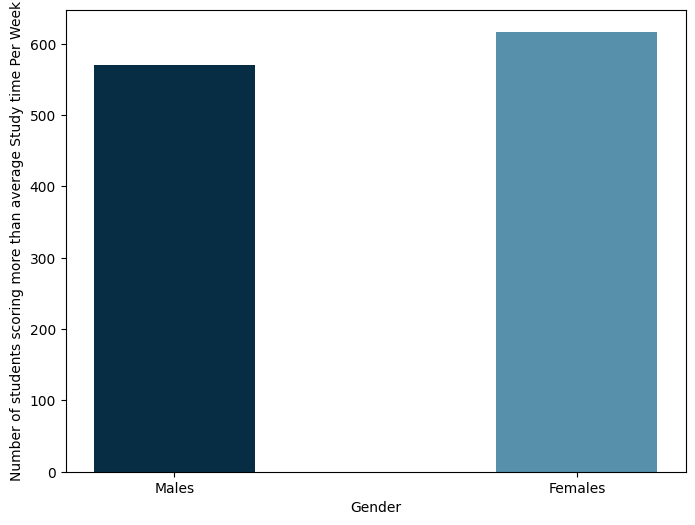

In [ ]:
males_studying_hours = (data[data['Gender']==0]['StudyTimeWeekly']>data['StudyTimeWeekly'].mean()).sum()
females_studying_hours = (data[data['Gender']==1]['StudyTimeWeekly']>data['StudyTimeWeekly'].mean()).sum()

x = ['Males', 'Females']
y = [males_studying_hours, females_studying_hours]

plt.bar(x, y, color=["#072D44", "#5790AB"], width=0.4)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('Gender')
plt.ylabel('Number of students scoring more than average Study time Per Week')
plt.show()

### From above plot,we can notice that study time per week is larger for females

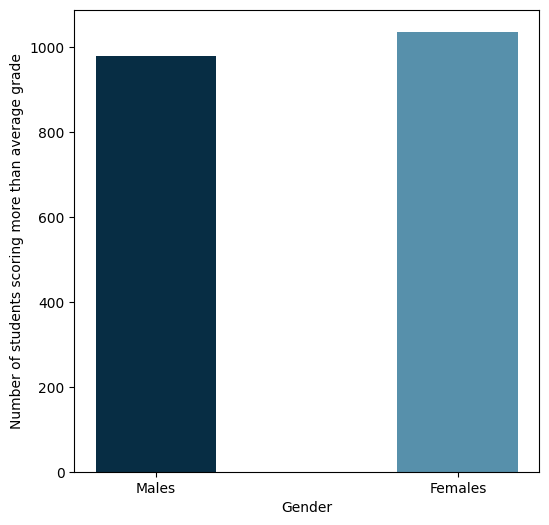

In [ ]:
mean_gpa=data['GPA'].mean()
males_scoring_more_than_average_grade_class = (data[data['Gender']==0]['GradeClass']>mean_gpa).sum()
females_scoring_more_than_average_grade_class = (data[data['Gender']==1]['GradeClass']>mean_gpa).sum()

x = ['Males', 'Females']
y = [males_scoring_more_than_average_grade_class, females_scoring_more_than_average_grade_class]

plt.bar(x, y, color=["#072D44", "#5790AB"], width=0.4)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('Gender')
plt.ylabel('Number of students scoring more than average grade')
plt.show()

### From above plot,we can notice that number of students who is scoring more than average gpa is larger for females

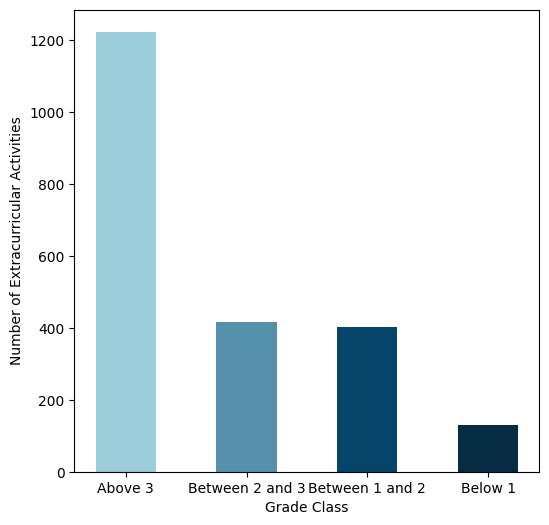

In [ ]:
activities_more_than_3_gradeclass = data[['Extracurricular', 'Sports', 'Music', 'Volunteering']][data['GradeClass'] > 3].sum().sum()
activities_from_2_to_3_gradeclass = data[['Extracurricular', 'Sports', 'Music', 'Volunteering']][(data['GradeClass'] <= 3) & (data['GradeClass'] > 2)].sum().sum()
activities_from_1_to_2_gradeclass = data[['Extracurricular', 'Sports', 'Music', 'Volunteering']][(data['GradeClass'] <= 2) & (data['GradeClass'] > 1)].sum().sum()
activities_less_than_1_gradeclass = data[['Extracurricular', 'Sports', 'Music', 'Volunteering']][data['GradeClass']<1].sum().sum()

x=["Above 3","Between 2 and 3","Between 1 and 2","Below 1"]
y=[activities_more_than_3_gradeclass,activities_from_2_to_3_gradeclass,activities_from_1_to_2_gradeclass,activities_less_than_1_gradeclass]
plt.bar(x, y, color=["#9CCDDB","#5790AB", "#064469","#072D44"], width=0.5)
plt.rcParams["figure.figsize"] = (8, 6)
plt.xlabel('Grade Class')
plt.ylabel('Number of Extracurricular Activities')
plt.show()

### Students scoring less grade(above 3) involved in large number of extracurricular activities,while those scoring higher grade(below 1) involved in less number of extracurricular activities